In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
# Convert data to dataframes
lung_df1 = pd.read_csv(os.path.join("Resources", "CDC_Cancer1.csv"))
lung_df2 = pd.read_csv(os.path.join("Resources", "CDC_Cancer2.csv"))

# Combine dataframes into single dataframe
lung_df = lung_df1.append(lung_df2, ignore_index=True)

# Delete unnecessary columns
lung_df = lung_df.drop(["Notes", "State Code", "Year Code", "Sex Code", "Race Code", "Age Group Code"], axis=1)

In [4]:
# Check to see if there are any null values in dataframe
lung_df.isnull().sum()

State         102
Year          102
Sex           102
Race          102
Age Group     102
Deaths        102
Population    102
Crude Rate    102
dtype: int64

In [5]:
# Drop rows that have nothing but null values
lung_df = lung_df.dropna(how="all")
# Verify there are no null values left
lung_df.isnull().sum()

State         0
Year          0
Sex           0
Race          0
Age Group     0
Deaths        0
Population    0
Crude Rate    0
dtype: int64

In [6]:
# Cast "Year", "Deaths", and "Population" columns as integers
lung_df["Year"] = lung_df["Year"].astype(int)
lung_df["Deaths"] = lung_df["Deaths"].astype(int)
lung_df["Population"] = lung_df["Population"].astype(int)
lung_df.head()

,State,Year,Sex,Race,Age Group,Deaths,Population,Crude Rate
0,Alabama,2006,Female,American Indian or Alaska Native,< 1 year,0,131,0.0
1,Alabama,2006,Female,American Indian or Alaska Native,1-4 years,0,788,0.0
2,Alabama,2006,Female,American Indian or Alaska Native,5-9 years,0,1093,0.0
3,Alabama,2006,Female,American Indian or Alaska Native,10-14 years,0,1237,0.0
4,Alabama,2006,Female,American Indian or Alaska Native,15-19 years,0,1305,0.0


In [45]:
# Create dataframe of lung cancer deaths by year and race
lung_ages_df = lung_df.groupby(["Year", "Age Group"])["Deaths"].sum().unstack()
pop_ages_df = lung_df.groupby(["Year", "Age Group"])["Population"].sum().unstack()
lung_ages_df

Age Group,1-4 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,5-9 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85+ years,< 1 year
Year,,,,,,,,,,,,,,,,,,,
2006,0,0,0,0,0,0,32,864,3990,0,7581,12500,17766,21991,24862,26593,21224,15485,0
2007,0,0,0,0,0,0,0,807,3775,0,7541,12068,18094,22378,24656,26080,21392,16071,0
2008,0,0,0,0,0,0,0,589,3599,0,7720,11926,17838,22768,24363,25348,21597,16916,0
2009,0,0,0,0,0,0,0,585,3448,0,7827,11946,17902,22964,24413,24535,21287,17091,0
2010,0,0,0,0,0,0,0,409,2973,0,7803,12086,17891,23088,24315,24101,21455,17802,0
2011,0,0,0,0,0,0,0,355,2679,0,7531,12377,18275,22670,24394,23653,20807,18105,0
2012,0,0,0,0,0,0,0,234,2436,0,7406,12667,17683,23440,24775,23506,20465,18565,0
2013,0,0,0,0,0,0,0,294,2123,0,6998,12941,17331,23264,25146,23134,19904,18807,0
2014,0,0,0,0,0,0,16,338,1708,0,6725,12782,17521,23135,25753,23273,19475,18724,0


In [55]:
# Combine first few zero columns
#lung_ages_df = lung_ages_df.drop(["1-4 years"]+ ["10-14 years"]+["15-19 years"]+["20-24 years"]+["25-29 years"]+
#                                          ["30-34 years"] + ["< 1 year"], axis=1)
#cols = lung_ages_df.columns.tolist()
#cols = cols[-1:] + cols[:-1]
#lung_ages_df = lung_ages_df[cols]

#lung_ages_crude = 100000*lung_ages_df.loc[2015]/pop_ages_df.loc[2015]
list

Age Group
1-4 years      0
10-14 years    0
dtype: int64

In [57]:
#Set values for each section of the pie chart
lung_race_perc = lung_race_df.loc[2015]/lung_race_df.loc[2015].sum()
pop_race_perc = pop_race_df.loc[2015].tolist()/pop_race_df.loc[2015].sum()

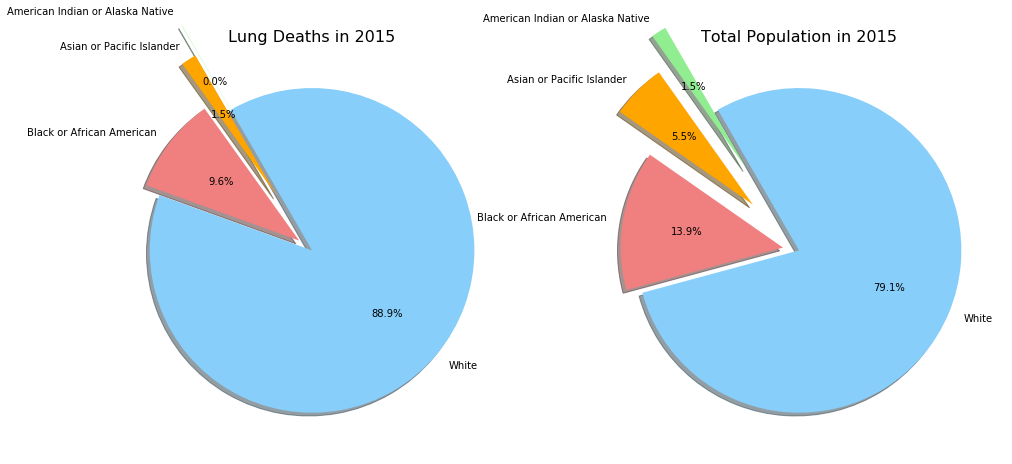

In [86]:
explode = [0.6, 0.4, 0.1, 0]
labels = list(lung_race_df)
colors = ["lightgreen", "orange", "lightcoral", "lightskyblue"]

fig, [ax1,ax2] = plt.subplots(1, 2, figsize = (16, 8))
ax1.set_title("Lung Deaths in 2015, fontsize = 16)
ax2.set_title("Total Population in 2015", fontsize = 16)
ax1.pie(lung_race_perc, labels = labels, colors = colors, explode = explode, autopct="%1.1f%%",shadow=True, 
        startangle = 120)
ax2.pie(pop_race_perc, labels = labels, colors = colors, explode = explode, autopct="%1.1f%%",shadow=True, 
        startangle = 120)
plt.savefig(os.path.join("Output", "Pie_Chart_2015_Cancer.png"))
plt.show()